In [38]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [39]:

#download the dataset from the kaggle directory
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
## since the downloaded dataset in Zip format so unZip it
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [21]:
##use generators(image_dataset_from_directory) to divide into batches
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int', ##assign 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)

)
validation_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int', ##assign 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)

)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
## Normalize to the level ( 0 to 1)
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset=train_dataset.map(process)
validation_dataset=validation_dataset.map(process)

In [23]:
##creating CNN model with 4 convolution layer


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
625/625 [==============================] - 77s 115ms/step - loss: 0.8960 - accuracy: 0.6183 - val_loss: 0.6370 - val_accuracy: 0.6712
Epoch 2/20
625/625 [==============================] - 69s 109ms/step - loss: 0.5201 - accuracy: 0.7427 - val_loss: 0.5856 - val_accuracy: 0.7076
Epoch 3/20
625/625 [==============================] - 72s 115ms/step - loss: 0.4449 - accuracy: 0.7936 - val_loss: 0.4721 - val_accuracy: 0.7736
Epoch 4/20
625/625 [==============================] - 69s 110ms/step - loss: 0.3713 - accuracy: 0.8288 - val_loss: 0.3365 - val_accuracy: 0.8548
Epoch 5/20
625/625 [==============================] - 68s 109ms/step - loss: 0.2891 - accuracy: 0.8735 - val_loss: 0.3279 - val_accuracy: 0.8576
Epoch 6/20
625/625 [==============================] - 72s 114ms/step - loss: 0.2233 - accuracy: 0.9050 - val_loss: 0.3762 - val_accuracy: 0.8466
Epoch 7/20
625/625 [==============================] - 69s 110ms/step - loss: 0.1609 - accuracy: 0.9323 - val_loss: 0.2957 - val_ac

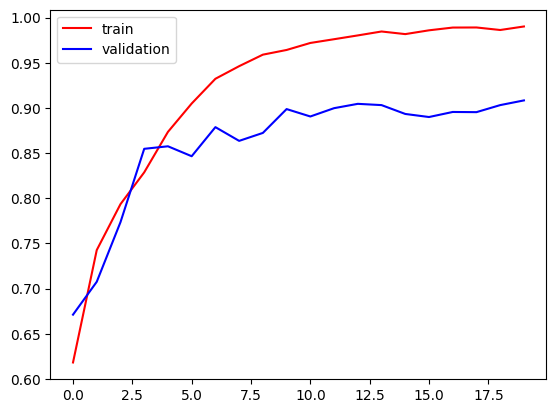

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2

In [32]:
test_img = cv2.imread('/content/cat.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 497ms/step


array([[1.]], dtype=float32)

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)

In [34]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB

In [36]:

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import numpy as np
import gradio as gr
import cv2

# Define the class names
class_names = ['Cat', 'Dog']

# Load your trained model
model = load_model('/content/dogs_vs_cats_model.h5')

def predict_image(image):
    # Preprocess the image
    image = cv2.resize(image, (256, 256))
    image = image.reshape((1, 256, 256, 3))
    image = image / 255.0
    # Make a prediction
    prediction = model.predict(image)
    prediction_label = class_names[int(prediction[0] > 0.5)]
    return prediction_label

# Create the Gradio interface
interface = gr.Interface(fn=predict_image,
                         inputs="image",
                         outputs="text",
                         title="Cat vs Dog Classifier",
                         description="Upload an image of a cat or a dog to get the prediction.")

# Launch the Gradio interface
if __name__ == "__main__":
    interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://27ba6b6046b9781ef5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
